In [3]:
import networkx as nx

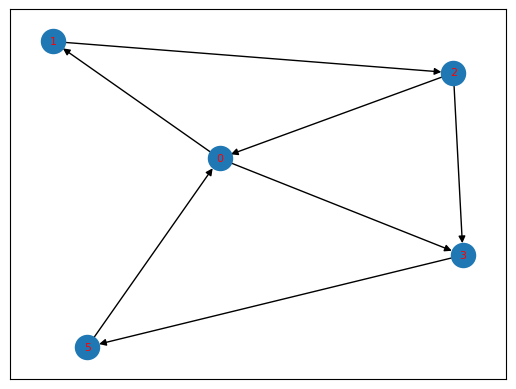

In [12]:
#Sample Graph with Cycles
pairs = [(0, 1), (1, 2), (2,0),(2,3),(0,3),(3,5),(5,0)]
G = nx.DiGraph(pairs)
nx.draw_networkx(G, font_size=8, font_color='r')

cycle_paths = list(nx.simple_cycles(G))



In [13]:
#Parsing teh graph to get the - Edge mapped to the index of cycles it is part of
dict_cycles_edges = {}
for num_cycle,cycle in enumerate(cycle_paths):
    for i in range(1,len(cycle)):
        if((cycle[i-1],cycle[i]) in dict_cycles_edges):
            dict_cycles_edges[(cycle[i-1],cycle[i])].append(num_cycle)
        else:
            dict_cycles_edges[(cycle[i-1],cycle[i])] = [num_cycle]

dict_cycles_edges

{(0, 3): [0], (3, 5): [0, 1], (0, 1): [1, 2], (1, 2): [1, 2], (2, 3): [1]}

In [14]:
#Sorting the edges in desc order by number of cycles it is part of
dict_cycles_edges_sorted = sorted(dict_cycles_edges.items(), key= lambda x: len(x[1]), reverse=True)
print(dict_cycles_edges_sorted)
print("-"*15)
num_cycles = len(cycle_paths)
minVal = len(pairs)
optimal_rm_edges_indices = []

    

[((3, 5), [0, 1]), ((0, 1), [1, 2]), ((1, 2), [1, 2]), ((0, 3), [0]), ((2, 3), [1])]
---------------


In [15]:
#Recursion alogorithm to minimise the no.of edges removed
'''
cycles_covered -  List of index of Cycles where we already elimintaed and edge and hence are free of cycle
indx : The idnex of edge we are at
rm_edges_indices : The list of edges we have so far removed 
minVal :  Minimum num.of edges to be remove to remove cycles
optimal_rm_edges_indices : The optimal set of edges to be remove for the minVal case
'''
def remove_edges(cycles_covered,indx,rm_edges_indices):
    global minVal
    global optimal_rm_edges_indices
    # If equal we have already handled all the cycles we update the minVal if our currentvalue is lower than the previous value of minVal
    if(len(cycles_covered) == num_cycles):
        
        if(len(rm_edges_indices) < minVal):
            minVal = len(rm_edges_indices)
            optimal_rm_edges_indices = rm_edges_indices
    #If we havnt still tried all the edges
    elif(indx < len(dict_cycles_edges)):
        #Remove the current edge and progress to see what the final count of edges to removed is
        remove_edges(list(set(cycles_covered+dict_cycles_edges_sorted[indx][1])),indx+1,rm_edges_indices+[indx])
        #Do not remove the current edge and progress to see what the final count of edges to removed is
        remove_edges(cycles_covered,indx+1,rm_edges_indices)


remove_edges([],0,[])
print(optimal_rm_edges_indices)
print([dict_cycles_edges_sorted[i][0] for i in optimal_rm_edges_indices])

[0, 1]
[0, 1, 2]
[0, 1]
-----
[0, 1]
[(3, 5), (0, 1)]


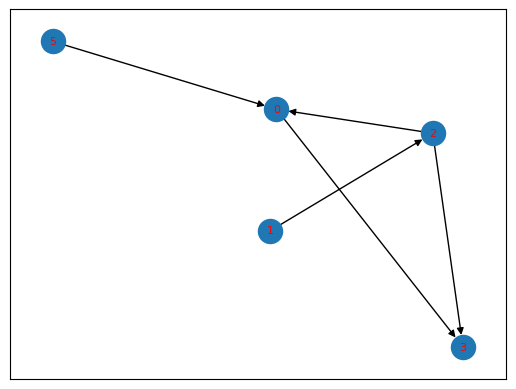

In [16]:
#What it looks like after receiving the edges
G_rm_cycles = G.copy()
G_rm_cycles.remove_edges_from([dict_cycles_edges_sorted[i][0] for i in optimal_rm_edges_indices])

nx.draw_networkx(G_rm_cycles, font_size=8, font_color='r')